In [1]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import numpy as np

Face Pattern Recognition

In [9]:
#Define image to work with
img_path="Images/real_Classroom2.jpeg"
img = cv2.imread(img_path)
#Select the model to be used for detection varying the list index
detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]
faces = DeepFace.extract_faces(img_path, detector_backend=detectors[4])
facesCoordinatesList=[]

In [10]:
#Extract only the coordinates features
print("Number of detected faces : " + str(len(faces)))
for i in range(len(faces)):
    facesCoordinatesList.append(faces[i]["facial_area"])
for element in facesCoordinatesList:
    cv2.rectangle(img, (element["x"], element["y"]),(element["x"] + element["w"], element["y"] + element["h"]), (73, 32, 238), 5)

Number of detected faces : 6


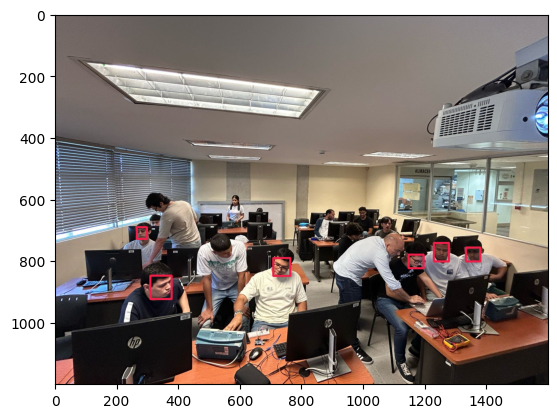

In [11]:

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Facial recognition and metrics about position of facial features

In [8]:
objRecognition=DeepFace.verify(img1_path="Images/single2.jpeg",img2_path="Images/single11.jpeg",model_name="Dlib",detector_backend="retinaface")
objRecognition

{'verified': True,
 'distance': 0.06340265385761057,
 'threshold': 0.07,
 'model': 'Dlib',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 552,
   'y': 189,
   'w': 349,
   'h': 489,
   'left_eye': (830, 377),
   'right_eye': (663, 399)},
  'img2': {'x': 830,
   'y': 537,
   'w': 278,
   'h': 397,
   'left_eye': (941, 693),
   'right_eye': (857, 699)}},
 'time': 28.89}

Mathematical metrics for analizing facial similarity

In [4]:
from scipy.spatial.distance import euclidean,cosine

#Obtain the analysis of the image
embedding1=DeepFace.represent(img_path="single2.jpeg",model_name="ArcFace", detector_backend="retinaface")
embedding2=DeepFace.represent(img_path="single11.jpeg",model_name="ArcFace", detector_backend="retinaface")

#Extract the multi-dimensional vector only
embedding1Vector1=np.array(embedding1[0]["embedding"])
embedding1Vector2=embedding2[0]["embedding"]

def cosine_similarity(embedding1, embedding2):
    dot_product = np.dot(embedding1, embedding2)
    norm1 = np.linalg.norm(embedding1)
    norm2 = np.linalg.norm(embedding2)
    similarity = dot_product / (norm1 * norm2)
    return similarity

print("Cosine similarity is "+ str(cosine_similarity(embedding1Vector1,embedding1Vector2)))

def euclidean_distance(embedding1,embedding2):
    return euclidean(embedding1,embedding2)

print("Euclidean distance is "+ str(euclidean_distance(embedding1Vector1,embedding1Vector2)))



Cosine similarity is 0.35477153678865364
Euclidean distance is 3.8419692767006404
